# 📚 **Credit Scoring Classification – Table of Contents**

Navigate to any section by clicking below:

- [1. Load & Explore Data](#1-Load--Explore-Data)
- [2. Data Cleaning & Preprocessing](#2-Data-Cleaning--Preprocessing)
- [3. Feature Engineering](#3-Feature-Engineering)
- [4. Model Training](#4-Model-Training)
- [5. Model Evaluation](#5-Model-Evaluation)
- [6. Hyperparameter Tuning](#6-Hyperparameter-Tuning)
- [7. Final Prediction on Test Set](#7-Final-Prediction-on-Test-Set)
- [8. Model Explainability (SHAP/LIME)](#8-Model-Explainability-SHAPLIME)


In [1]:
import numpy as np
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from imblearn.over_sampling import SMOTE
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

## 1. Load & Explore Data


In [2]:
df = pd.read_csv('dataset/archive/train.csv')
pd.set_option('display.max_columns', None)
df.sample(5)

/tmp/ipykernel_6427/2463543499.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/archive/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
61425,0x17deb,CUS_0x4d77,February,NaN,45,298-87-8791,Engineer,119875.35,NaN,1,1,11,2,"Student Loan, and Payday Loan",7,11,3.78,1.0,_,1224.18,30.352186,33 Years and 0 Months,No,191.541413,65.21300416831079,High_spent_Large_value_payments,968.0068331764194,Good
35935,0xe88d,CUS_0xb7e,August,Saikat Chatterjeeo,24,395-85-0199,Mechanic,14441.54,1369.461667,9,5,22,6,"Debt Consolidation Loan, Mortgage Loan, Payday...",26,19,9.87,11.0,Bad,2176.93,30.051556,NaN,Yes,47.799526,103.67499177393805,Low_spent_Large_value_payments,255.47164914267216,Standard
66514,0x19bbc,CUS_0x5097,March,Luciana Lopezc,20,907-16-4737,Developer,17328.675,1208.056250,3,6,15,3,"Auto Loan, Home Equity Loan, and Not Specified",24,15,7.84,8.0,_,460.46,33.013399,22 Years and 5 Months,Yes,27.613965,73.95258133454959,Low_spent_Small_value_payments,309.2390783422767,Standard
15788,0x7282,CUS_0xb182,May,Tim Reidh,28,784-97-8297,_______,19903.785,1670.648750,1,4,7,0,NaN,0,NaN,4.33,1.0,Good,1015.4,26.589297,29 Years and 1 Months,No,0.000000,190.44896388376634,Low_spent_Small_value_payments,266.6159111162337,Standard
6142,0x39fc,CUS_0xa81d,July,Yoko Kubotaj,23,#F%$D@*&8,Media_Manager,82093.52,6574.126667,8,5,6,4,"Payday Loan, Auto Loan, Debt Consolidation Loa...",7,8,3.4,1.0,Standard,825.25,27.577442,20 Years and 2 Months,No,188.833815,618.1221138819324,Low_spent_Medium_value_payments,130.45673758055057,Standard


## 2. Data Cleaning & Preprocessing

In [3]:
# renaming columns
df.rename(columns={'Monthly_Inhand_Salary': 'Monthly_Inhand_Salary',
                   'Total_EMI_per_month': 'Monthly_EMI'}, inplace=True)
                
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Monthly_EMI', 'Amount_invested_monthly',
       'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [4]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.strip().str.strip('_')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')

In [5]:
# drop unnecessary columns
df.drop(columns=['ID','Num_Credit_Inquiries','Credit_Mix'], inplace=True)

# Checking the distribution of 'Payment_of_Min_Amount'
print('-' * 50)
print(df['Payment_of_Min_Amount'].value_counts())

# Checking the distribution of 'Credit_History_Age'\
print('-' * 50)
print(df['Credit_History_Age'].value_counts().head(5))

# Checking the avg of monthly inhand salary
print('-' * 50)
print("avg monthly salary: ", df['Monthly_Inhand_Salary'].mean())

# avg of 'Outstanding_Debt'
print('-' * 50)
print("avg outstanding debt: ", df['Outstanding_Debt'].mean())

# the distribution of 'Type_of_Loan'
print('-' * 50)
print(df['Type_of_Loan'].value_counts().head(5))

# the avg of 'Monthly_EMI'
print('-' * 50)
print(df['Monthly_EMI'].mean())


--------------------------------------------------
Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64
--------------------------------------------------
Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
Name: count, dtype: int64
--------------------------------------------------
avg monthly salary:  4194.170849600523
--------------------------------------------------
avg outstanding debt:  1426.220376
--------------------------------------------------
Type_of_Loan
Not Specified              1408
Credit-Builder Loan        1280
Personal Loan              1272
Debt Consolidation Loan    1264
Student Loan               1240
Name: count, dtype: int64
--------------------------------------------------
1403.1182166159933


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Name                      90015 non-null   object 
 3   Age                       100000 non-null  object 
 4   SSN                       100000 non-null  object 
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  object 
 7   Monthly_Inhand_Salary     84998 non-null   float64
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Interest_Rate             100000 non-null  int64  
 11  Num_of_Loan               100000 non-null  object 
 12  Type_of_Loan              88592 non-null   object 
 13  Delay_from_due_date       100000 non-null  in

In [7]:
# check the missing values
df.isnull().sum()

Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Monthly_EMI                     0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [8]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [9]:
# the prediction could be biased since the standard has 53174 samples, poor has 28998 samples, and good has 17828 samples so we will use SMOTE to balance the dataset later

In [10]:
df

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Monthly_EMI,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [11]:
# fill missing values
from sklearn.impute import KNNImputer

# 1. Fill missing categorical values
df['Name'] = df['Name'].fillna('Unknown')
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('Unknown')
df['Credit_History_Age'] = df['Credit_History_Age'].fillna('Unknown')

# 2. Clean and convert numerical columns
numerical_cols = ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment',
                  'Amount_invested_monthly', 'Monthly_Balance']

for col in numerical_cols:
    df['col'] = df[col].astype(str) 
    df[col] = df[col].replace(r'[^0-9.-]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')  # NaNs kept
    df[col] = df[col].fillna(0)  # Fill NaNs with 0

# 3. Apply KNN imputer (after cleaning, without pre-filling with 0)
imputer = KNNImputer(n_neighbors=5)
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])


df.isnull().sum()

Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Monthly_EMI                 0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
col                         0
dtype: int64

In [12]:
# 4. Clean and convert Annual_Income
df['Annual_Income'] = df['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce').fillna(0)

# 5. Clean Age and Num_of_Loan
df['Age'] = df['Age'].fillna('0').str.extract(r'(\d+)').astype(float).fillna(0).astype(int)
df['Num_of_Loan'] = df['Num_of_Loan'].fillna('0').str.extract(r'(\d+)').astype(float).fillna(0).astype(int)

# 6. Clean Outstanding_Debt
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce').fillna(0)

In [13]:
# 7. Convert Credit_History_Age to total months
def parse_years_and_months(age: str) -> int:
    """Convert 'X Years and Y Months' to total months"""
    if isinstance(age, str):
        try:
            years = int(age.split(' Years')[0]) if 'Years' in age else 0
            months = int(age.split('and')[-1].split(' Months')[0].strip()) if 'Months' in age else 0
            return years * 12 + months
        except Exception:
            return 0
    return 0

df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(parse_years_and_months)


In [14]:
# 8. Clip unrealistic values
df['Age'] = df['Age'].clip(lower=14, upper=100)
df['Monthly_Balance'] = df['Monthly_Balance'].clip(lower=-1e5, upper=1e5)

# 9. Clip known-positive columns to eliminate negatives
positive_cols = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 
                 'Delay_from_due_date', 'Num_of_Delayed_Payment',
                 'Monthly_EMI', 'Amount_invested_monthly']

# Removing rediculous top outliers (2%)
selected_columns_train = df[positive_cols]
percentile_threshold = 0.98
percentiles = selected_columns_train.quantile(percentile_threshold)
for column in selected_columns_train.columns:
    df = df[df[column] <= percentiles[column]]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91343 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_ID                91343 non-null  object 
 1   Month                      91343 non-null  object 
 2   Name                       91343 non-null  object 
 3   Age                        91343 non-null  int64  
 4   SSN                        91343 non-null  object 
 5   Occupation                 91343 non-null  object 
 6   Annual_Income              91343 non-null  float64
 7   Monthly_Inhand_Salary      91343 non-null  float64
 8   Num_Bank_Accounts          91343 non-null  int64  
 9   Num_Credit_Card            91343 non-null  int64  
 10  Interest_Rate              91343 non-null  int64  
 11  Num_of_Loan                91343 non-null  int64  
 12  Type_of_Loan               91343 non-null  object 
 13  Delay_from_due_date        91343 non-null  int64  


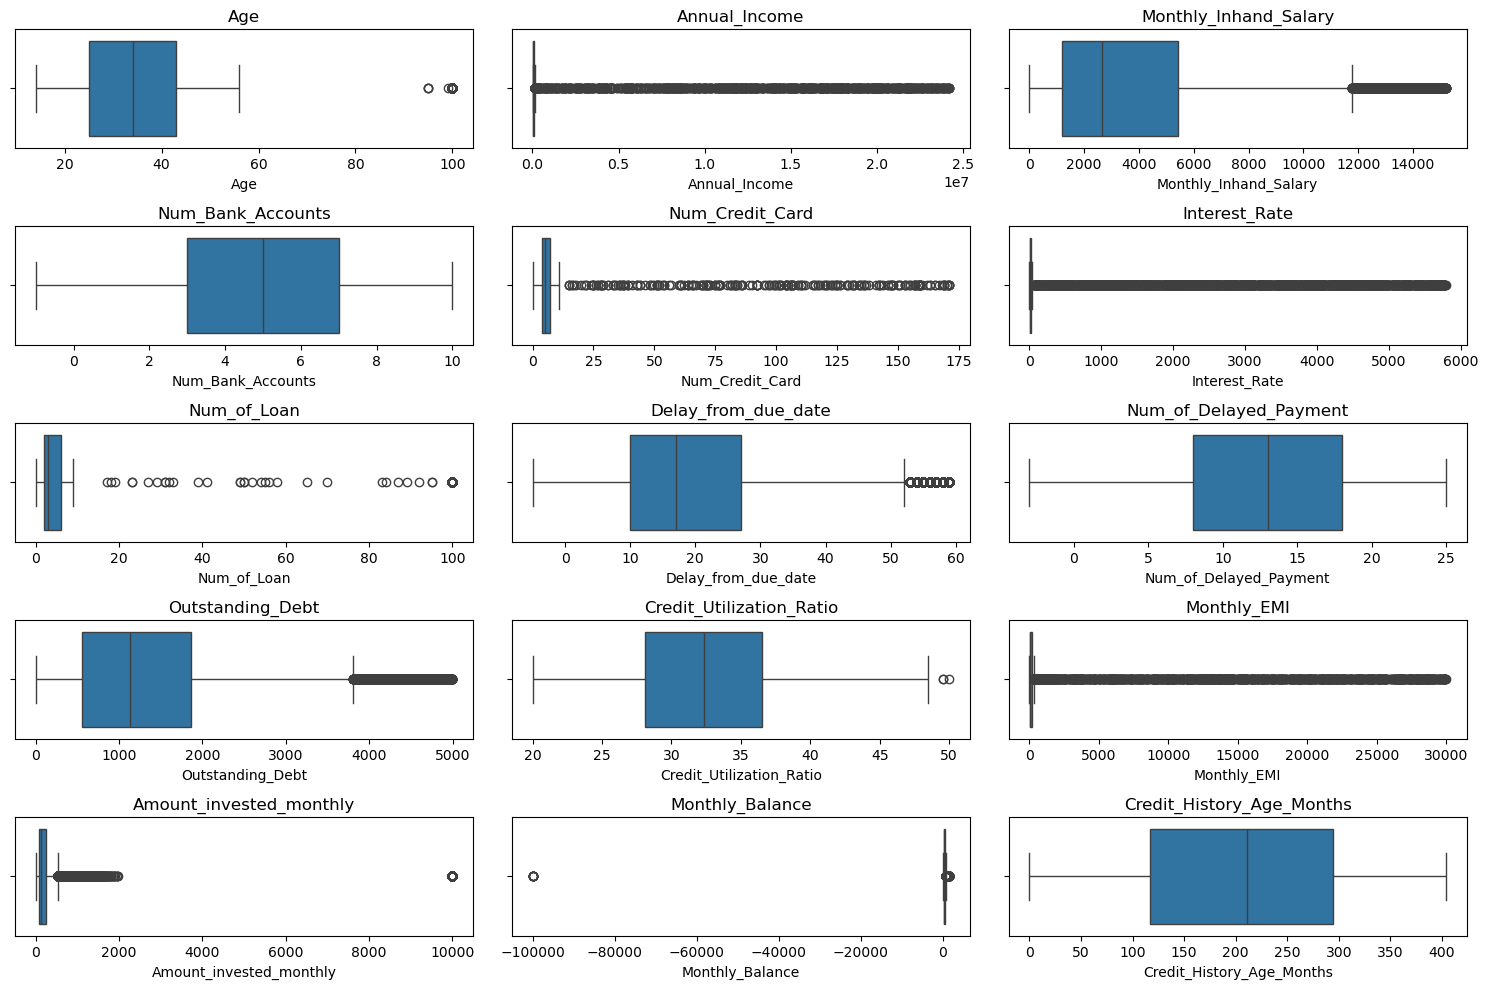

In [16]:
# show the boxplot for all the numerical columns in the dataset using subplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()  

In [17]:
# for age Bin 80+ as "80"
df['Age'] = df['Age'].apply(lambda x: 80 if x >= 80 else x)

# for Num_Bank_Accounts Winsorize top 1% (cap at 10)
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].clip(upper=10)

# convert loan type to categorical and bin values > 15 as "High"
df['Type_of_Loan'] = pd.to_numeric(df['Type_of_Loan'], errors='coerce')
df['Type_of_Loan'] = df['Type_of_Loan'].fillna(0)  # Fill NaNs with 0
df['Type_of_Loan'] = df['Type_of_Loan'].astype(int)  # Convert to int
df['Type_of_Loan'] = df['Type_of_Loan'].replace(r'[^0-9]', '', regex=True)  # Remove non-numeric characters

# Bin values > 15 as "High"	 for num_of_loans
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x: 'High' if x > 15 else x)

# Winsorize top 2% (cap at $4500) for outstanding debt (means to make sure no one has more than $4500 in outstanding debt, otherwise then make it $4500)
df['Outstanding_Debt'] = df['Outstanding_Debt'].clip(upper=4500)

# for invested monthly Log transform + winsorize top 1%
df['Amount_invested_monthly'] = np.log1p(df['Amount_invested_monthly'])
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].clip(upper=df['Amount_invested_monthly'].quantile(0.99))

# for num credit card sqrt transform
df['Num_Credit_Card'] = np.sqrt(df['Num_Credit_Card'])

# for Delay_from_due_date Cap at 90 days + create binary flag
df['Delay_from_due_date'] = df['Delay_from_due_date'].clip(upper=90)
df['Delay_Flag'] = np.where(df['Delay_from_due_date'] > 0, 1, 0)

# for monthly balance only keep positive values
df['Monthly_Balance'] = df['Monthly_Balance'].clip(lower=0)


# interest rate cap at 1%
df['Interest_Rate'] = df['Interest_Rate'].clip(upper=1.0)

# mothly EMI cap at $550
df['Monthly_EMI'] = df['Monthly_EMI'].clip(upper=550)



In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,91343.0,34.680578,1.309917e+01,14.00,25.000000,34.000000,43.000000,8.000000e+01
Annual_Income,91343.0,176971.983732,1.429800e+06,7005.93,19592.490000,37819.130000,73442.970000,2.419806e+07
Monthly_Inhand_Salary,91343.0,3593.913370,3.317529e+03,0.00,1194.210417,2640.437500,5427.272116,1.520463e+04
Num_Bank_Accounts,91343.0,5.304380,2.582734e+00,-1.00,3.000000,5.000000,7.000000,1.000000e+01
Num_Credit_Card,91343.0,2.317033,6.094864e-01,0.00,2.000000,2.236068,2.645751,1.307670e+01
Interest_Rate,91343.0,1.000000,0.000000e+00,1.00,1.000000,1.000000,1.000000,1.000000e+00
Type_of_Loan,91343.0,0.000000,0.000000e+00,0.00,0.000000,0.000000,0.000000,0.000000e+00
Delay_from_due_date,91343.0,20.208237,1.386405e+01,-5.00,10.000000,17.000000,27.000000,5.900000e+01
Num_of_Delayed_Payment,91343.0,12.174989,6.868440e+00,-3.00,8.000000,13.000000,18.000000,2.500000e+01
Outstanding_Debt,91343.0,1384.424008,1.115876e+03,0.23,554.690000,1137.020000,1857.210000,4.500000e+03


In [19]:
# Removing rediculous top outliers (2%)

selected_columns_train = df[['Num_Bank_Accounts', 'Interest_Rate', 'Annual_Income', 'Num_of_Delayed_Payment', 'Monthly_EMI', 'Num_Credit_Card']]

percentile_threshold = 0.98
percentiles = selected_columns_train.quantile(percentile_threshold)

for column in selected_columns_train.columns:
    df = df[df[column] <= percentiles[column]]

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,87782.0,34.722825,13.097089,14.00,25.000000,34.000000,43.000000,80.000000
Annual_Income,87782.0,49941.614362,36791.117691,7005.93,19519.660000,36964.220000,71625.200000,167067.080000
Monthly_Inhand_Salary,87782.0,3526.575759,3188.971373,0.00,1197.841667,2630.539167,5379.470000,14131.123333
Num_Bank_Accounts,87782.0,5.286084,2.570416,-1.00,3.000000,5.000000,7.000000,10.000000
Num_Credit_Card,87782.0,2.292219,0.456389,0.00,2.000000,2.236068,2.645751,3.162278
Interest_Rate,87782.0,1.000000,0.000000,1.00,1.000000,1.000000,1.000000,1.000000
Type_of_Loan,87782.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
Delay_from_due_date,87782.0,20.039154,13.716972,-5.00,10.000000,17.000000,27.000000,59.000000
Num_of_Delayed_Payment,87782.0,12.026873,6.714509,-3.00,8.000000,12.000000,17.000000,24.000000
Outstanding_Debt,87782.0,1365.902629,1102.228192,0.23,551.260000,1125.300000,1812.460000,4500.000000


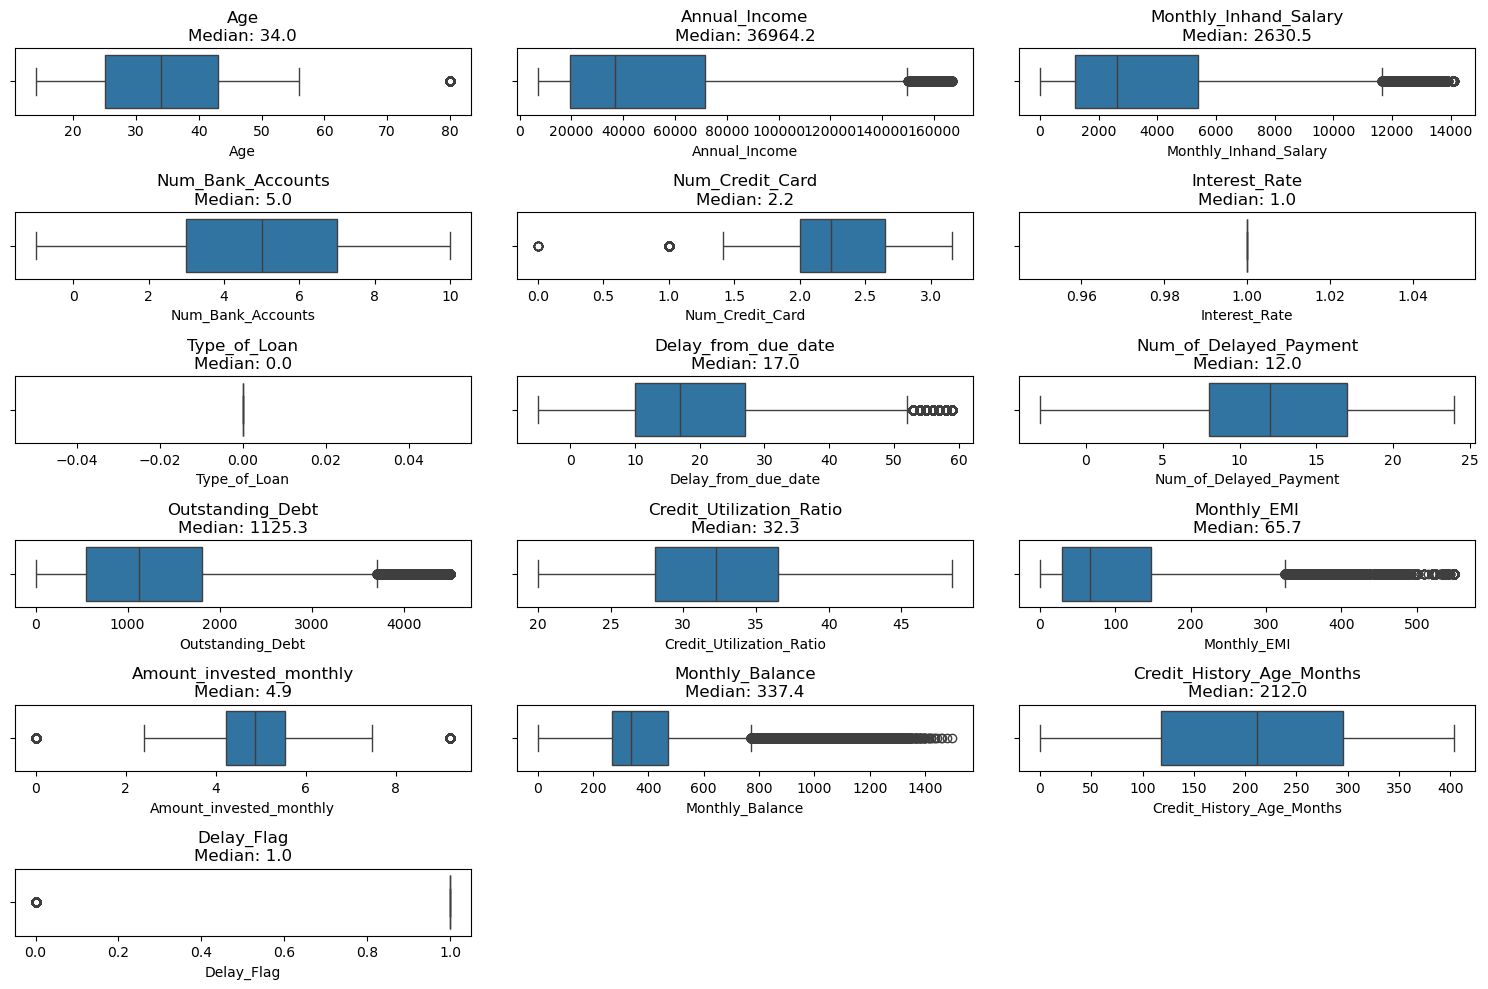

In [21]:
# Count numerical columns
num_cols = len(df.select_dtypes(include=['float64', 'int64']).columns)
rows = (num_cols // 3) + (1 if num_cols % 3 else 0)  # Dynamic row calculation

plt.figure(figsize=(15, 10))  # Scale height based on rows
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f"{column}\nMedian: {df[column].median():.1f}")  # Add median for reference
plt.tight_layout()
plt.show()

## 3. Feature Engineering

In [22]:
# drop col column
df.drop(columns=['col'], inplace=True)

credit_score = df.pop('Credit_Score')
df['Credit_Score'] = credit_score

In [24]:
# how many times Aaron Maashoh appears in the dataset
aaron_count = df[df['Name'].str.contains('Aaron Maashoh', case=False, na=False)].shape[0]
print(f"Aaron Maashoh appears {aaron_count} times in the dataset.")

Aaron Maashoh appears 7 times in the dataset.


In [25]:
df.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Monthly_EMI', 'Amount_invested_monthly',
       'Payment_Behaviour', 'Monthly_Balance', 'Credit_History_Age_Months',
       'Delay_Flag', 'Credit_Score'],
      dtype='object')

In [26]:
df['Month'].value_counts()

Month
July        11013
June        10991
May         10987
March       10982
April       10961
January     10960
February    10956
August      10932
Name: count, dtype: int64

In [ ]:
"""RFM (Recency, Frequency, Monetary) columns"""
# create a "Frequency" column that contains many times the Customer_ID appears in the dataset
df['Frequency'] = df['Customer_ID'].map(df['Customer_ID'].value_counts())

# encode the months as integers
df['Month'].replace({'January': 1, 'February': 2, 'March': 3, 'April': 4,
                     'May': 5, 'June': 6, 'July': 7,
                     'August': 8, 'September': 9, 'October': 10,
                     'November': 11, 'December': 12}, inplace=True)

# get the latest month the Customer_ID appears in the dataset
df['Recency'] = df.groupby('Customer_ID')['Month'].transform('max') - 9


In [32]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      22276
High_spent_Medium_value_payments    15465
Low_spent_Medium_value_payments     12138
High_spent_Large_value_payments     12024
High_spent_Small_value_payments     10043
Low_spent_Large_value_payments       9171
!@9#%8                               6665
Name: count, dtype: int64

In [33]:
df['Payment_Behaviour'].replace({'!@9#%8': 'Medium_spent_Moderate_value_payments',}, inplace=True)
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments          22276
High_spent_Medium_value_payments        15465
Low_spent_Medium_value_payments         12138
High_spent_Large_value_payments         12024
High_spent_Small_value_payments         10043
Low_spent_Large_value_payments           9171
Medium_spent_Moderate_value_payments     6665
Name: count, dtype: int64

In [41]:
df[['Credit_Utilization_Ratio','Changed_Credit_Limit', 'Outstanding_Debt']].head()

,Credit_Utilization_Ratio,Changed_Credit_Limit,Outstanding_Debt
0,26.822620,11.27,809.98
1,31.944960,11.27,809.98
2,28.609352,_,809.98
3,31.377862,6.27,809.98
4,24.797347,11.27,809.98


In [ ]:
# monetary is contains the last Outstanding_Debt for each Customer_ID
df['Monetary'] = df.groupby('Customer_ID')['Outstanding_Debt'].transform('last')

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Monthly_EMI,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Months,Delay_Flag,Credit_Score,Frequency,Recency,Monetary
0,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,2.0,1,4,0,3,7.0,11.27,809.98,26.822620,22 Years and 1 Months,No,49.574949,4.399563,High_spent_Small_value_payments,312.494089,265,1,Good,8,-1,809.98
1,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,0.000000,3,2.0,1,4,0,-1,0.0,11.27,809.98,31.944960,Unknown,No,49.574949,4.781476,Low_spent_Large_value_payments,284.629162,0,0,Good,8,-1,809.98
2,CUS_0xd40,3,Aaron Maashoh,80,821-00-0265,Scientist,19114.12,0.000000,3,2.0,1,4,0,3,7.0,_,809.98,28.609352,22 Years and 3 Months,No,49.574949,4.415214,Low_spent_Medium_value_payments,331.209863,267,1,Good,8,-1,809.98
3,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,0.000000,3,2.0,1,4,0,5,4.0,6.27,809.98,31.377862,22 Years and 4 Months,No,49.574949,5.300605,Low_spent_Small_value_payments,223.451310,268,1,Good,8,-1,809.98
4,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,2.0,1,4,0,6,0.0,11.27,809.98,24.797347,22 Years and 5 Months,No,49.574949,3.747624,High_spent_Medium_value_payments,341.489231,269,1,Good,8,-1,809.98


In [53]:
# decode month column
df['Month'] = df['Month'].map({
    1: 'January', 2: 'February', 3: 'March',
    4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September',
    10: 'October', 11: 'November', 12: 'December'})

df['Month'].value_counts()

Month
July        11013
June        10991
May         10987
March       10982
April       10961
January     10960
February    10956
August      10932
Name: count, dtype: int64